<a href="https://colab.research.google.com/github/sudipbhattarai820/Machine_Learning_Projects/blob/main/HeartAttack_Prediction_Using_DNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Predictions using DNN with Tensorflow

##Data Gathering

In [146]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
## Lets import the data from my google drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_DataSets/heart.csv')

##EDA (Exploratory Data Analysis)

In [148]:
## Let's first display the top 10 rows of the data
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Some information about the datasets
* age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

In [149]:
## Lets see some sumarry of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [150]:
## Let's see if the columns have any null values
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Observations:** As we can see there are no null values in any column

In [151]:
## Now lets see the stastistical summary of the data
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [152]:
## Let's see the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [153]:
## Let's separate the categorical columns and numerical columns
cat_attributes = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_attributes = ['age','trtbps','chol','thalachh','oldpeak']
target_attribute = ['output']

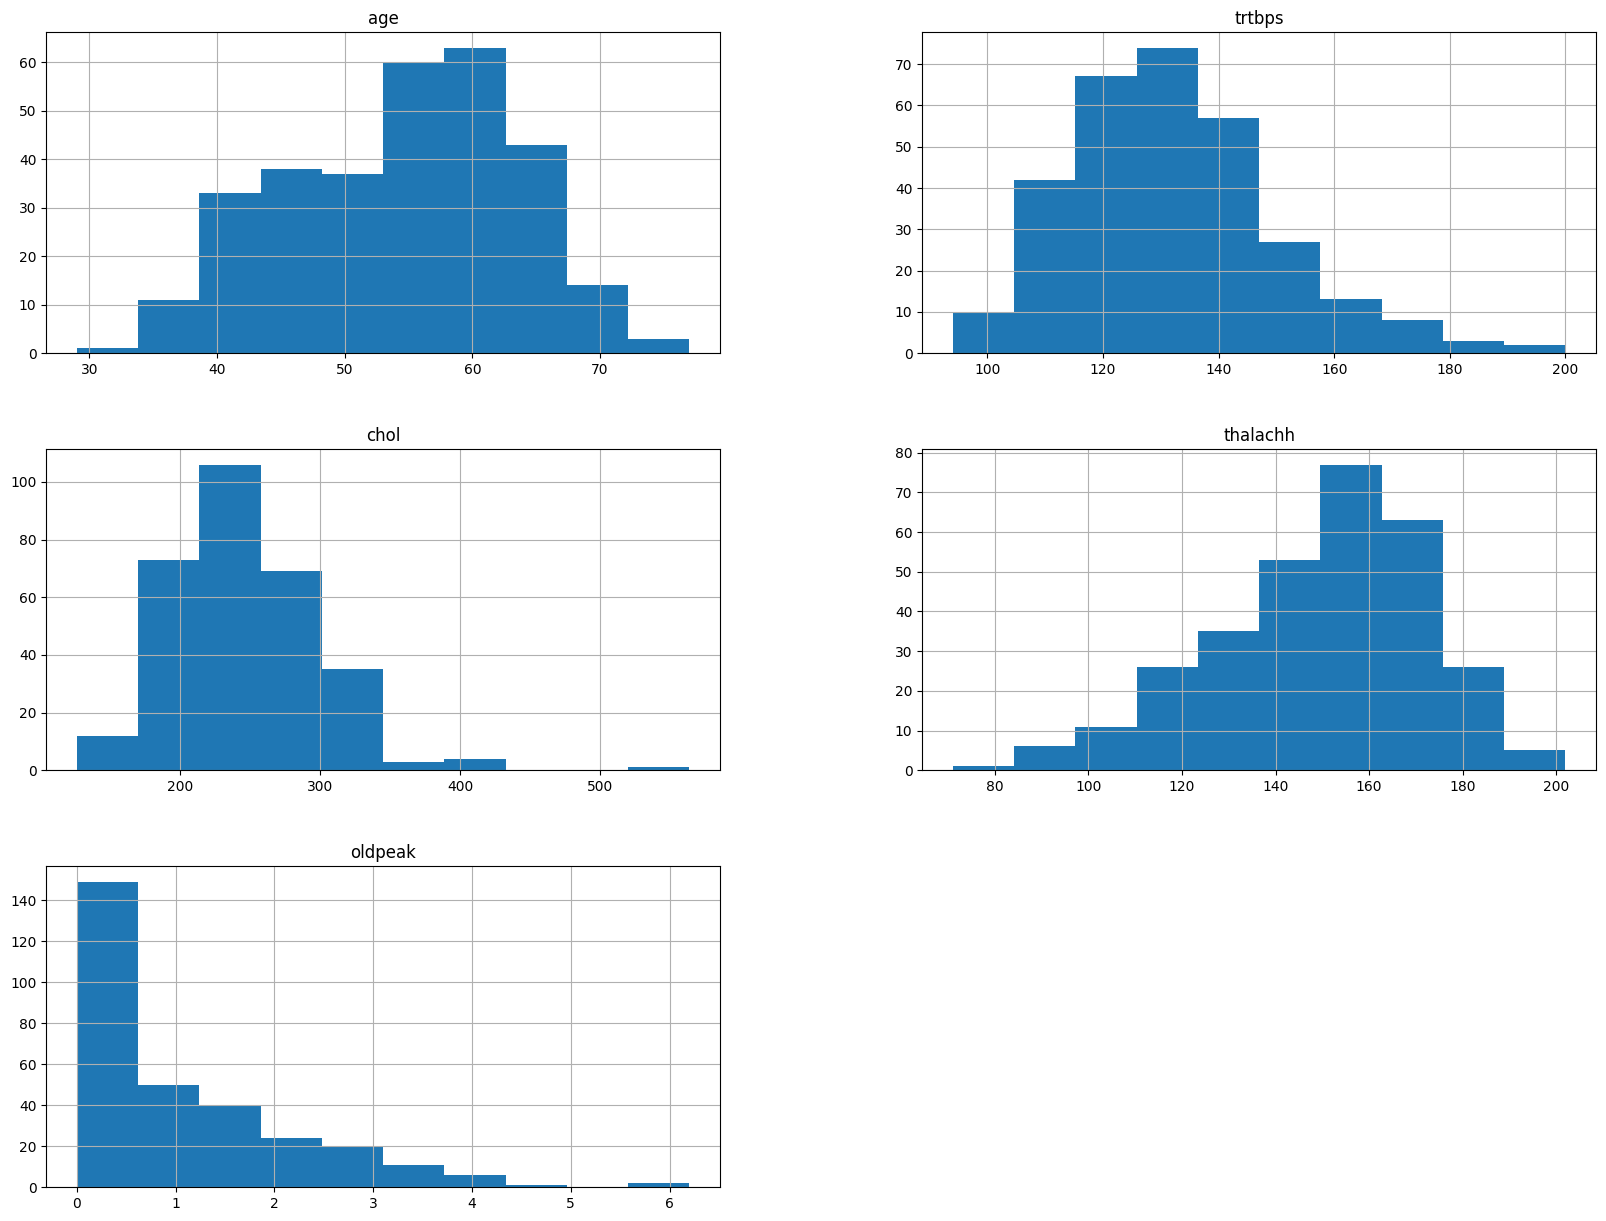

In [154]:
## Let's plot the histograms of the attributes in the data
data[num_attributes].hist(figsize=(20,15))
plt.show()

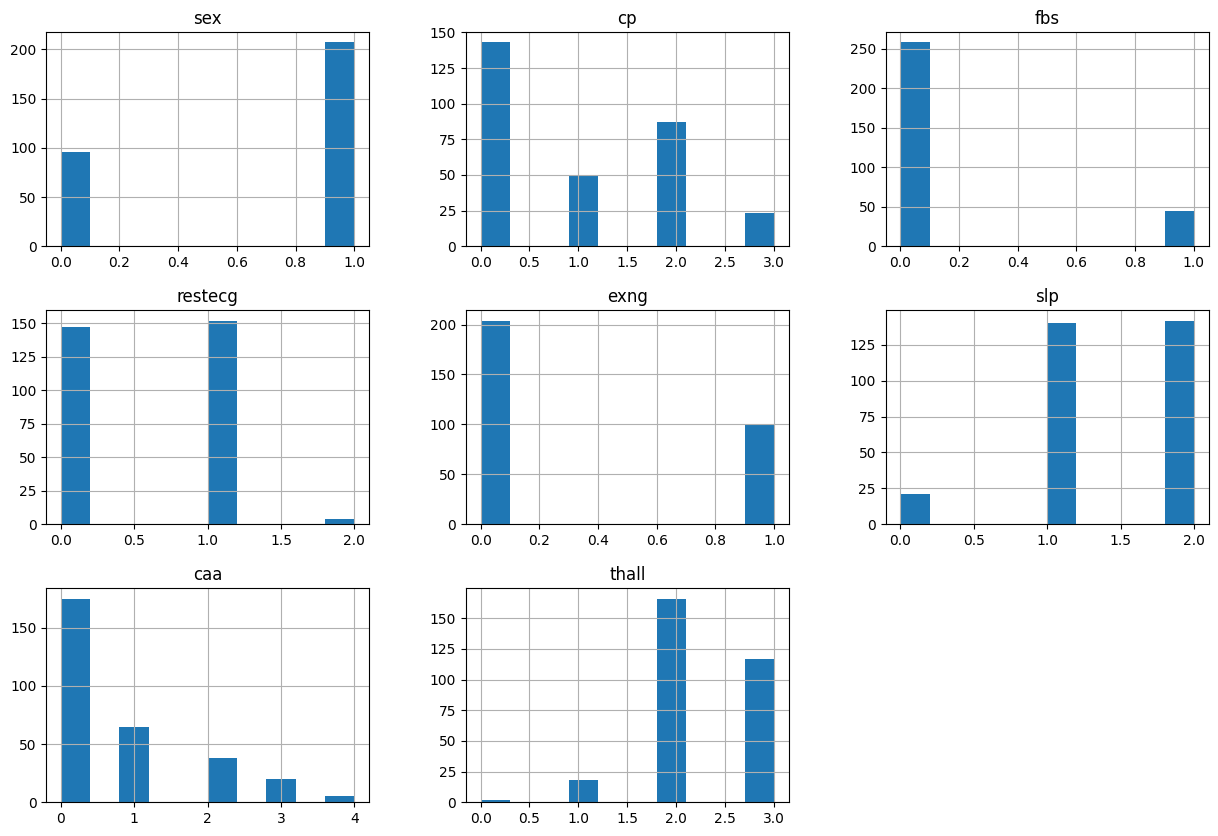

In [155]:
# Now lets draw bar plot foe the bargraph
data[cat_attributes].hist(figsize=(15,10))
plt.show()

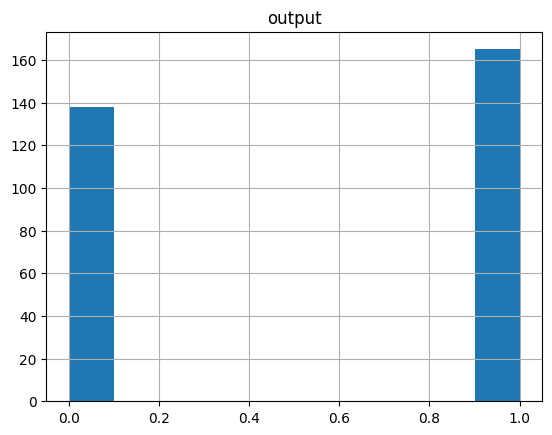

In [156]:
## Lets see the target class distributions
data[target_attribute].hist()
plt.show()

In [157]:
ratio_of_target_class = (data[target_attribute]==1).sum()/(data[target_attribute]==0).sum() ## Just calculating the ratio of two classes
ratio_of_target_class

output    1.195652
dtype: float64

**Observations:** As we can see that both classes are balanced

### Corelation between Numerical Attributes

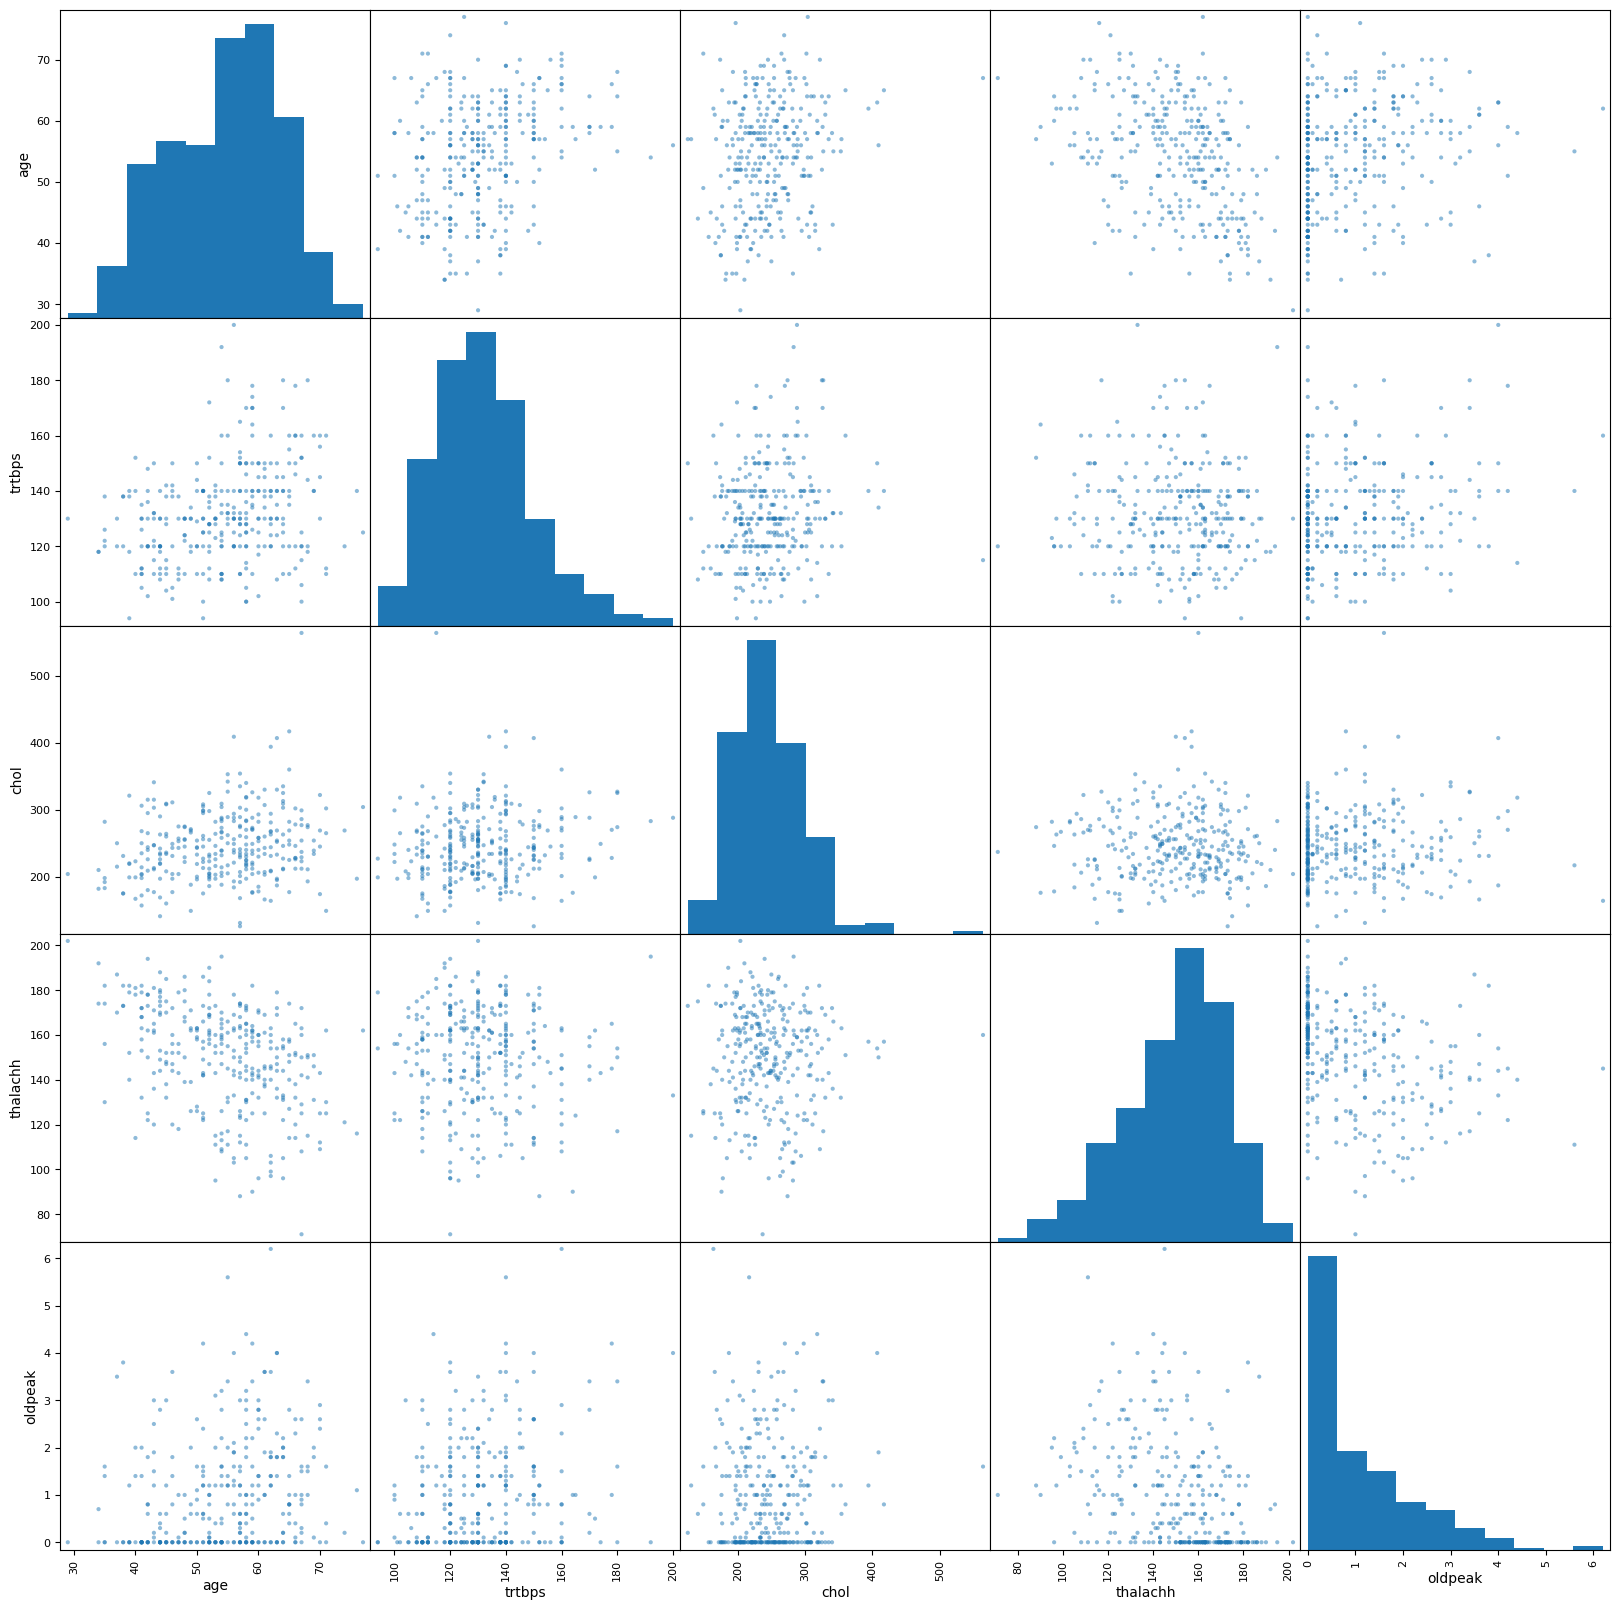

In [158]:
## Finally, lets see the corelation of the features which are numerical
pd.plotting.scatter_matrix(data[num_attributes],figsize=(20,20))
plt.show()

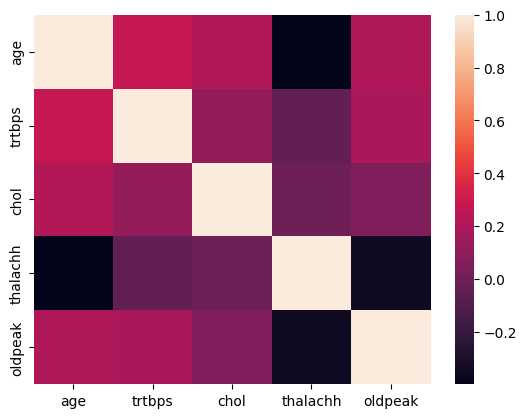

In [159]:
## We can use pearson's correaltion coefficient to find the correaltion among the numerical attributes.
sns.heatmap(data[num_attributes].corr(method='pearson'))
plt.show()

### Correlation among the categorical attributes
* This is not important as others, but this really helps if you want to understand the corelation between the variables that are categorical.

In [160]:
from scipy.stats import chi2_contingency
## First let's create a correlation matrix
corr_matrix_cat_chi_squared = pd.DataFrame(np.zeros((len(cat_attributes),len(cat_attributes))),columns=cat_attributes,index=cat_attributes)
corr_matrix_cat_p_value = pd.DataFrame(np.zeros((len(cat_attributes),len(cat_attributes))),columns=cat_attributes,index=cat_attributes)
## Now calculating the chi-squared test between each categorical columns
for i , var1 in enumerate(cat_attributes):
  for j, var2 in enumerate(cat_attributes):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    corr_matrix_cat_chi_squared.iloc[i, j] = p_value

### Pricipal Component Analysis to visualize the data

In [161]:
from sklearn.decomposition import PCA
pca_num = PCA(n_components=2)
pca_components = pca_num.fit_transform(data[num_attributes])
## Let's create a dataframe
pca_df = pd.DataFrame({'PC1':pca_components[:,0],'PC2':pca_components[:,1],'y':data['output']})
pca_df

,PC1,PC2,y
0,-12.262002,2.896713,1
1,2.695004,-39.870489,1
2,-42.950471,-23.626963,1
3,-10.941438,-28.427149,1
4,106.978994,-15.873752,1
...,...,...,...
298,-4.556610,27.481336,0
299,16.432851,12.955101,0
300,-51.967081,13.295349,0
301,-114.758909,36.411343,0


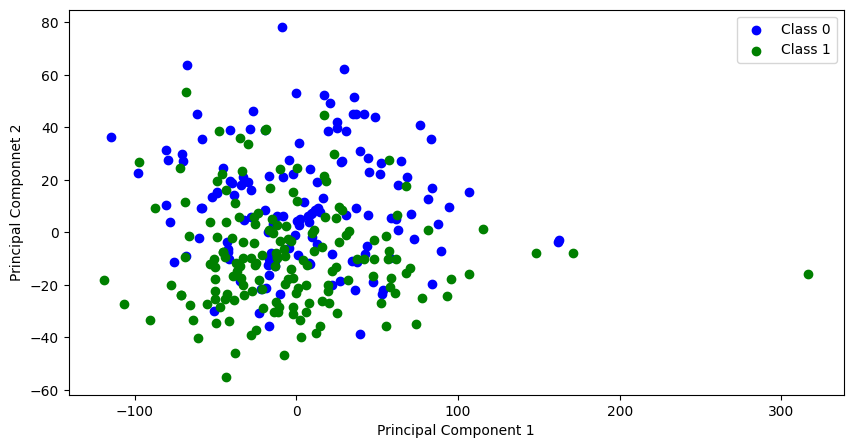

In [162]:
## Let's plot a scatter plot to visualize the two different classes
plt.figure(figsize=(10,5))
plt.scatter(pca_df[pca_df['y']==0]['PC1'],pca_df[pca_df['y']==0]['PC2'],c='blue',label="Class 0")
plt.scatter(pca_df[pca_df['y']==1]['PC1'],pca_df[pca_df['y']==1]['PC2'],c='green',label="Class 1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Componnet 2')
plt.legend()
plt.show()

**Observations:** As we can see the data is not easily separable, we have to use linear function to separate these two classes.

## Data Preprocessing

In [163]:
#Lets first split the data into predictors and target variables
y = data.iloc[:,-1]
#Now, lets drop the target attribute from the dataframe
data_train = data.drop(target_attribute,axis=1)

In [164]:
## The second step is to transform all the attributes into one hot coded and scale numerical values we are going to use sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## Let's define pipeline for the numerical attributes
num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [165]:
## Now let's use sklearn columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attributes),
    ('cat',OneHotEncoder(sparse_output=False),cat_attributes)
])

In [166]:
data_prepared = full_pipeline.fit_transform(data_train)

## Training and Evaluating

In [226]:
#Let's import train and test split from the sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_prepared,y,random_state=30)

### Model Selection
* We can select any classifier that deals with non linear data logistic, SVM or Decision Trees, Random Forest or XGboost. But, for this problem we are selecting neural networks with Tensorflow.

In [402]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

## Let's compile the model
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy']
                )

In [403]:
epochs = 10
history = model_1.fit(X_train,y_train,verbose=0,epochs=epochs,validation_split=0.1)

# Model Evaluation

In [404]:
## Let's see the hsitory of out training
history_df = pd.DataFrame({"Loss":history.history['loss'],'Val_loss':history.history['val_loss'],'epochs':np.arange(1,epochs+1,1)})

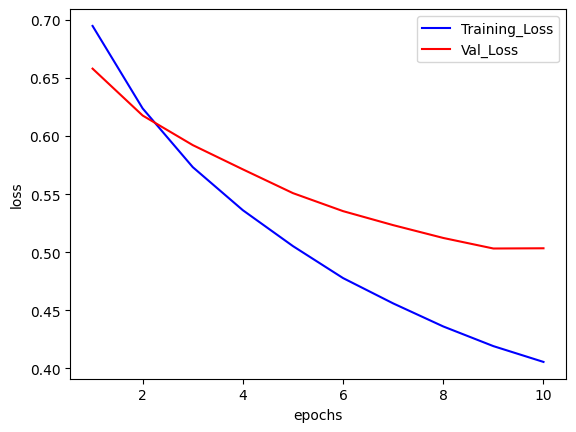

In [405]:
## Let's plot the training loss and validation loss
plt.plot(history_df['epochs'],history_df['Loss'],c='blue',label='Training_Loss')
plt.plot(history_df['epochs'],history_df['Val_loss'],c='red',label='Val_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [406]:
model_1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.3879 - accuracy: 0.8553


[0.38790225982666016, 0.8552631735801697]

In [407]:
y_pred = np.array(model_1.predict(X_test))
threshold = 0.5
binary_predictions = (y_pred > threshold).astype(int)


3/3 [==============================] - 0s 5ms/step


In [408]:
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score
cfm = confusion_matrix(y_test,binary_predictions)

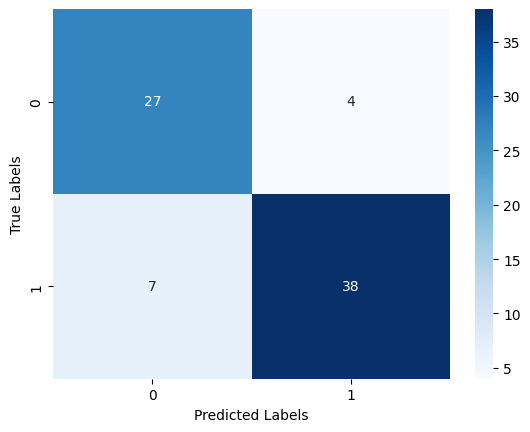

In [409]:
sns.heatmap(cfm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [411]:
print("Recall-score is:{}".format(recall_score(y_test,binary_predictions)))
print("ROC-AUC-score is:{}".format(roc_auc_score(y_test,binary_predictions)))

Recall-score is:0.8444444444444444
ROC-AUC-score is:0.8577060931899642


# Conclusion

* The main benifit of this dataset was its usage, as it was cleaned and there was no single values missing.
* Next, important thing was we undersood from this data wa there are some corelation between the attributes such as age and choloestrol level so we don't want this in our stastical machine learning such as linear and logistic regression as assumption of multcolinearity is violated.
* We used PCA to visualize the data to see how the class are distributed and it seemed they were very difficult to separate.
* We used DNN with Tensorflow, to predict the chances of heartattack.
* We used recall as metrics to evaluate our data because we dont want to identify someone with low chances of heart attack when they symptoms clearly indicate they have high chance of heart attack.
* I was satisfied with the recall score and settled with this model.
* But we can still tweak paramters and improve the model.